<a href="https://colab.research.google.com/github/jcmachicao/curso_intro_nn/blob/main/nn_demo_intermedio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Cursos Machine Learning**
# **Demostración de Red Neuronal Complejidad Intermedia**
---
### **Introducción a Redes Neuronales**
* Autor: José Carlos Machicao
* Licencia: [GestioDinámica](http://www.gestiodinamica.com) 2022

[Tensorflow Playground](https://playground.tensorflow.org)

In [ ]:
#!pip install torch

In [1]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt 

In [2]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
ruta = 'drive/My Drive/00 data/'

In [6]:
dataset = pd.read_excel(ruta + 'ActosViolentos.xlsx')
dataset.head()

,Edad,Hora,Sexo,Area,Ingreso,Violento
0,Niño,17.0,M,A1,2.0,No Violento
1,Niño,3.0,F,A3,4.0,No Violento
2,Niño,19.0,F,A1,3.0,No Violento
3,Niño,23.0,M,A1,2.0,No Violento
4,Niño,7.0,F,A2,5.0,Violento


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Edad      900 non-null    object 
 1   Hora      900 non-null    float64
 2   Sexo      900 non-null    object 
 3   Area      900 non-null    object 
 4   Ingreso   900 non-null    float64
 5   Violento  900 non-null    object 
dtypes: float64(2), object(4)
memory usage: 42.3+ KB


In [8]:
cat_var = ['Edad', 'Sexo', 'Area']
cat_num = ['Hora', 'Ingreso']

In [9]:
dataset[cat_var].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Edad    900 non-null    object
 1   Sexo    900 non-null    object
 2   Area    900 non-null    object
dtypes: object(3)
memory usage: 21.2+ KB


In [10]:
dataset[cat_var].Edad.unique()

array(['Niño', 'Adulto', 'AdultoMayor', 'Joven'], dtype=object)

In [11]:
data_cat = pd.get_dummies(dataset[cat_var], drop_first=True)
data_num = dataset[cat_num]
data = pd.concat([data_cat, data_num], axis=1)
scl = MinMaxScaler()
scl.fit(data)
data = scl.transform(data)
data.shape, type(data)

((900, 9), numpy.ndarray)

In [12]:
type(data)

numpy.ndarray

In [13]:
labels = np.array(pd.factorize(dataset.Violento)[0])
labels.shape, type(labels)

((900,), numpy.ndarray)

In [14]:
pd.factorize(dataset.Violento)[1]

Index(['No Violento', 'Violento'], dtype='object')

In [15]:
X_np = data.astype(np.float32)
y_np = labels.reshape(-1, 1).astype(np.float32)
#y_np = labels.reshape(-1, 1)

In [16]:
X = torch.from_numpy(X_np)
y = torch.from_numpy(y_np.reshape(-1, 1))

In [17]:
X.shape, y.shape

(torch.Size([900, 9]), torch.Size([900, 1]))

In [18]:
torch.cuda.device_count(), torch.cuda.get_device_name(0)

(1, 'Tesla T4')

In [19]:
X.shape

torch.Size([900, 9])

In [20]:
model = nn.Sequential(
  nn.Linear(X.shape[1], 512),
  nn.ReLU(),
  nn.Linear(512, 512),
  nn.ReLU(),
  nn.Linear(512, 512),
  nn.ReLU(),
  nn.Linear(512, 32),
  nn.ReLU(),
  nn.Linear(32, 1)
)

In [50]:
model.cuda()
X_g = X.cuda()
y_g = y.cuda()

In [51]:
optimizador = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0)
#criterio = torch.nn.CrossEntropyLoss().cuda()
criterio = torch.nn.MSELoss()

In [52]:
errores = []
nit = 0

In [53]:
EPOCS = 100000

In [57]:
preds = []
nit += 1
for epo in range(EPOCS):
  optimizador.zero_grad()
  y_pred = model(X_g)
  loss = criterio(y_pred, y_g)
  loss.backward()
  optimizador.step()
  if epo % 5000 == 0:
    print(epo, loss.item())
    errores.append([epo+nit*EPOCS, loss.item()])
    pred = y_pred.cpu().detach().numpy()
    preds.append(pred)

0 0.017547784373164177
5000 0.017767317593097687
10000 0.017414778470993042
15000 0.01731160655617714
20000 0.017222588881850243
25000 0.017204292118549347
30000 0.016844475641846657
35000 0.01695951446890831
40000 0.016845013946294785
45000 0.016569430008530617
50000 0.016764124855399132
55000 0.016548646613955498
60000 0.016381315886974335
65000 0.016330519691109657
70000 0.016292724758386612
75000 0.016257693991065025
80000 0.01621386595070362
85000 0.016271930187940598
90000 0.01616646908223629
95000 0.016266746446490288


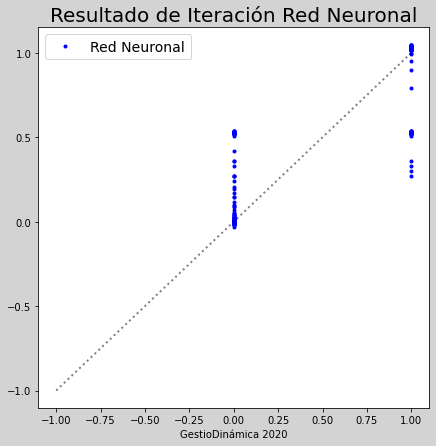

In [58]:
#@title Gráfica
plt.figure(figsize=(7,7), facecolor='lightgray')

plt.plot(y_np, pred, 'bo', ms=3, label='Red Neuronal')
plt.plot([-1,1], [-1, 1], 'k:', lw=2, alpha=0.5)

plt.title('Resultado de Iteración Red Neuronal', fontsize=20)
plt.legend(loc='best', fontsize=14)
plt.xlabel('GestioDinámica 2020')
plt.show()

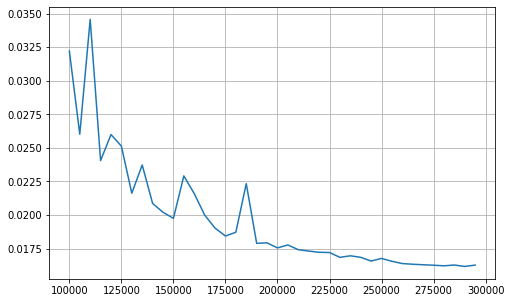

In [59]:
err_df = pd.DataFrame(errores)
plt.figure(figsize=(8,5), facecolor='white')
plt.plot(err_df[0], err_df[1])
plt.grid(True)
plt.show()

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
mlm = lr.fit(X_np, y_np)
nb = GaussianNB()
mnb = nb.fit(X_np, y_np)
pred_lm = mlm.predict(X_np)
pred_nb = mnb.predict(X_np)
len(X_np), len(pred_lm)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(900, 900)

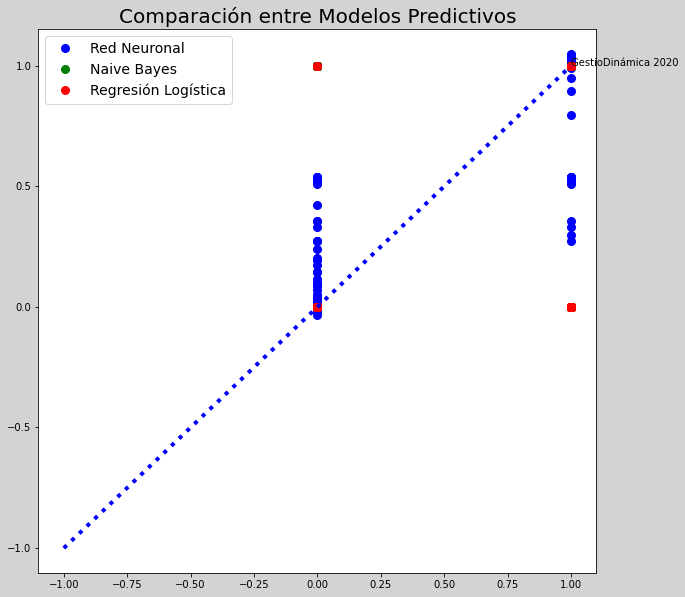

In [61]:
#@title Gráfica
plt.figure(figsize=(10,10), facecolor='lightgray')

plt.plot(y_np, pred, 'bo', ms=8, label='Red Neuronal')
plt.plot(y_np, pred_nb, 'go', ms=8, label='Naive Bayes')
plt.plot(y_np, pred_lm, 'ro', ms=8, label='Regresión Logística')
plt.plot([-1,1], [-1, 1], 'b:', lw=4)

plt.title('Comparación entre Modelos Predictivos', fontsize=20)
plt.legend(loc='best', fontsize=14)
plt.text(1,1, 'GestioDinámica 2020')
plt.show()

In [62]:
data_test = X[0:10].cuda()

In [63]:
data_cat.columns

Index(['Edad_AdultoMayor', 'Edad_Joven', 'Edad_Niño', 'Sexo_M', 'Area_A2',
       'Area_A3', 'Area_A4'],
      dtype='object')

In [64]:
data_test

tensor([[0.0000, 0.0000, 1.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.7083, 0.2500],
        [0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.1250, 0.7500],
        [0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.7917, 0.5000],
        [0.0000, 0.0000, 1.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.9583, 0.2500],
        [0.0000, 0.0000, 1.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.2917, 1.0000],
        [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.9167, 0.0000],
        [1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2500],
        [0.0000, 0.0000, 1.0000, 1.0000, 0.0000, 1.0000, 0.0000, 0.6250, 0.0000],
        [0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0417, 1.0000],
        [0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.3750, 0.0000]],
       device='cuda:0')

In [65]:
model(data_test)

tensor([[ 1.6486e-02],
        [ 1.0040e-03],
        [-1.2207e-02],
        [-8.6694e-03],
        [ 1.0089e+00],
        [ 6.3466e-02],
        [ 1.0089e+00],
        [-6.7879e-03],
        [ 1.0088e+00],
        [-1.1026e-03]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [66]:
#print(pred[0:10])
indices = [i for i in range(len(pred)) if pred[i] < 0.45]
len(indices)

719

In [67]:
data_10 = dataset.iloc[indices,:]
data_10 = data_10.reindex()
data_11 = data_10[['Edad', 'Sexo', 'Area', 'Violento']]
data_12 = data_11[data_11.Violento == 'No Violento']
data_12.head()

,Edad,Sexo,Area,Violento
0,Niño,M,A1,No Violento
1,Niño,F,A3,No Violento
2,Niño,F,A1,No Violento
3,Niño,M,A1,No Violento
5,Adulto,M,A4,No Violento


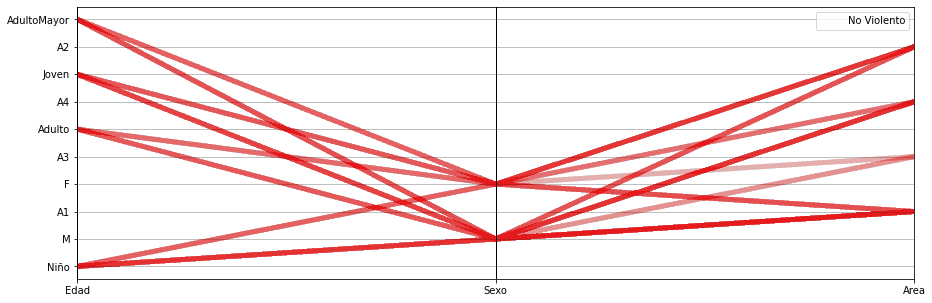

In [68]:
DATA = data_12
clase = 'Violento'
plt.figure(figsize=(15, 5), facecolor='white')
pd.plotting.parallel_coordinates(DATA, class_column=clase, lw=5, alpha=0.01, colormap='Set1')
plt.legend(loc='best')
plt.show()

### Referencias
https://medium.com/@benjamin.phillips22/simple-regression-with-neural-networks-in-pytorch-313f06910379
